In [0]:
import seaborn as sns
import pandas as pd
import datetime as dt
import calendar 
import statsmodels.api as sm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv(open('drive/My Drive/Colab Notebooks/lecture folder/Travel Pony Facebook.csv','rb'))
df.head(50)


,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.000000,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.000000,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.000000,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.000000,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.590000,2.512857
5,2013-11-22,2013-11-22,Bob Jackson,TravelPony: Conversion Test,7096,1.018743,7229,32,32,45.01,2,5,3,0,0,0,0,3,22.505000,9.002000
6,2013-11-21,2013-11-21,Bob Jackson,TravelPony: Conversion Test,29437,1.000000,29437,100,80,200.00,10,43,33,0,0,0,0,33,20.000000,4.651163
7,2013-11-21,2013-11-21,Bob Jackson,TravelPony: General Ads,30320,1.018239,30873,178,157,98.09,5,50,45,0,0,0,0,45,19.618000,1.961800
8,2013-11-20,2013-11-20,Bob Jackson,TravelPony: Conversion Test,25951,1.026820,26647,133,113,200.00,8,50,42,0,0,0,0,42,25.000000,4.000000
9,2013-11-20,2013-11-20,Bob Jackson,TravelPony: General Ads,49038,1.000000,49038,324,276,178.77,13,112,99,0,0,0,0,99,13.751538,1.596161


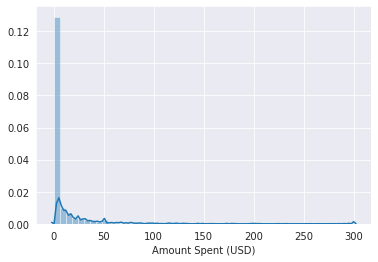

In [0]:
sns.set_style('darkgrid')
sns.distplot(df['Amount Spent (USD)'])

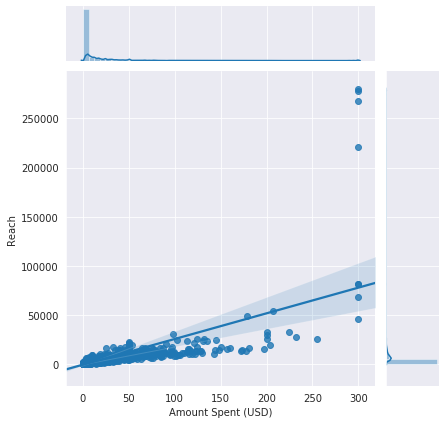

In [0]:
sns.jointplot("Amount Spent (USD)","Reach", data=df,kind='reg')

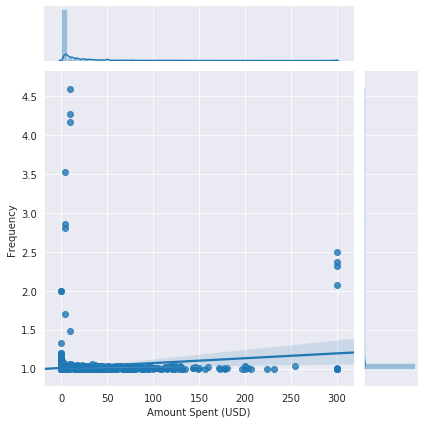

In [0]:
sns.jointplot("Amount Spent (USD)","Frequency", data=df,kind='reg')

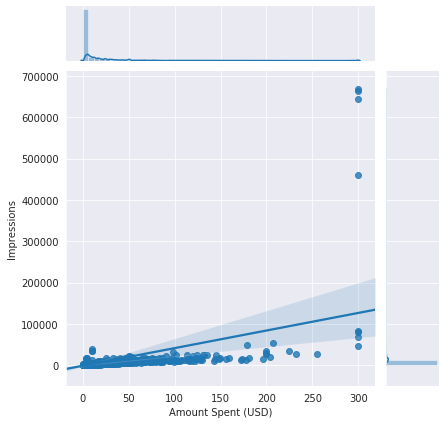

In [0]:
sns.jointplot("Amount Spent (USD)","Impressions", data=df,kind='reg')

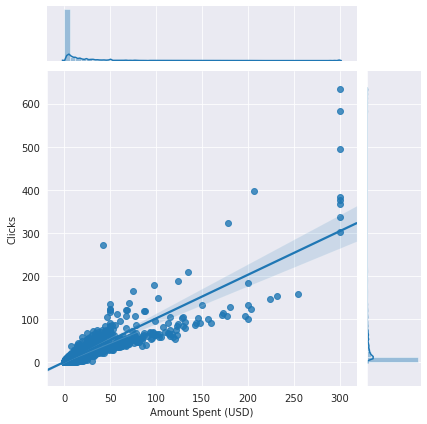

In [0]:
sns.jointplot("Amount Spent (USD)","Clicks", data=df,kind='reg')

In [0]:
# I made scatterplot to find the relation between amount spent, reach, frequency,impressions and clicks.

In [0]:
df['Campaign Name'] = df['Campaign Name'].astype('str')
df['Campaign Name'] = df['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]','')
df['Campaign Name'] = df['Campaign Name'].str.replace('\d+','')


In [0]:
df.loc[df['Campaign Name'].str.contains('Travelpony',case=False),'Campaign Name'] = 'Travel Pony'
df.loc[df['Campaign Name'].str.contains('Post',case=False),'Campaign Name'] = 'Post'
df.loc[df['Campaign Name'].str.contains('campaign',case=False),'Campaign Name'] = 'Campaign'
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,Travel Pony,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
CampaignName = pd.get_dummies(df['Campaign Name'])
CampaignName.head()

,Ad,Campaign,Cyber Weekend,Nanigans,Post,Travel Pony
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [0]:
# Removing campaign names that have long name, numbers and complicated signs. Renaming them 6 short names and converting them into dummy variables

In [0]:
df= pd.concat([df,CampaignName],axis=1)
df.tail(20)

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),Ad,Campaign,Cyber Weekend,Nanigans,Post,Travel Pony
3685,2013-07-30,2013-07-30,Bob Jackson,Travel Pony,4301,3.529644,15181,3,3,3.77,0,3,3,0,0,0,0,3,0.000000,1.256667,0,0,0,0,0,1
3686,2013-07-29,2013-07-29,Bob Jackson,Travel Pony,9214,4.164532,38372,5,5,10.00,0,5,5,0,0,0,0,5,0.000000,2.000000,0,0,0,0,0,1
3687,2013-07-28,2013-07-28,Bob Jackson,Travel Pony,7648,4.597411,35161,12,11,10.00,0,12,12,0,0,0,0,12,0.000000,0.833333,0,0,0,0,0,1
3688,2013-07-27,2013-07-27,Bob Jackson,Travel Pony,8149,4.267149,34773,5,4,9.52,0,6,6,0,0,0,0,6,0.000000,1.586667,0,0,0,0,0,1
3689,2013-07-26,2013-07-26,Bob Jackson,Travel Pony,6330,2.853397,18062,6,6,4.27,0,6,6,0,0,0,0,6,0.000000,0.711667,0,0,0,0,0,1
3690,2013-07-25,2013-07-25,Bob Jackson,Travel Pony,6088,2.811104,17114,1,1,3.61,0,1,1,0,0,0,0,1,0.000000,3.610000,0,0,0,0,0,1
3691,2013-07-24,2013-07-24,Bob Jackson,Travel Pony,8963,1.482874,13291,15,14,10.00,0,20,20,1,0,0,14,5,0.000000,0.500000,0,0,0,0,0,1
3692,2013-07-01,2013-07-01,Bob Jackson,Travel Pony,229,1.026201,235,3,3,3.31,3,3,0,0,0,0,0,0,1.103333,1.103333,0,0,0,0,0,1
3693,2013-06-30,2013-06-30,Bob Jackson,Travel Pony,626,1.062300,665,10,10,8.61,9,9,0,0,0,0,0,0,0.956667,0.956667,0,0,0,0,0,1
3694,2013-06-29,2013-06-29,Bob Jackson,Travel Pony,615,1.016260,625,5,5,6.73,2,2,0,0,0,0,0,0,3.365000,3.365000,0,0,0,0,0,1


In [0]:
# Adding those dummy columns to the existing table

In [0]:
dependent = df['Amount Spent (USD)']
Independent = df[['Ad ','Campaign','Cyber Weekend','Nanigans','Post','Travel Pony','Reach','Frequency','Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement',
                  'Post Likes','Post Comments','Post Shares','Photo Views','Website Clicks']]
mod = sm.OLS(dependent,Independent)
regression = mod.fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3208.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:59:57   Log-Likelihood:                -12190.
No. Observations:                3705   AIC:                         2.442e+04
Df Residuals:                    3687   BIC:                         2.453e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Ad                  0.3421      2.622     

In [0]:
# Running the linear regression followed what the question asked 

In [0]:
regressionsum = []
regressionsum = pd.concat([regression.params,regression.pvalues,],axis=1)
regressionsum.columns = ['coefficient','pvalue']
regressionsum

,coefficient,pvalue
Ad,0.342083,8.961951e-01
Campaign,0.500097,6.859099e-01
Cyber Weekend,-185.956347,5.678878e-23
Nanigans,-1.320982,3.151606e-01
Post,-11.627210,2.714467e-02
Travel Pony,7.889589,5.901748e-03
Reach,0.003230,1.102473e-174
Frequency,-0.884531,4.681800e-01
Impressions,-0.000832,2.976635e-45
Clicks,-0.364071,3.837923e-06


In [0]:
# Subseting only coefficient and p-value

In [0]:
newtable =  regressionsum[regressionsum['pvalue'] <= 0.05].sort_values(by='coefficient',ascending=False)
newtable

,coefficient,pvalue
Page Likes,24.422429,1.860570e-04
Post Engagement,18.000023,9.435006e-04
Travel Pony,7.889589,5.901748e-03
Post Shares,4.957789,7.836091e-06
Website Clicks,3.564708,1.082899e-03
Post Comments,3.555218,1.751681e-03
Photo Views,3.329390,2.265795e-03
Post Likes,2.592918,1.754013e-02
Unique Clicks,0.499866,1.754049e-08
Reach,0.003230,1.102473e-174


In [0]:
# Removing the variables with p-value greater than 0.05

In [0]:
newtable['rank']= newtable['coefficient'].rank(ascending=False).astype(int)
newtable

,coefficient,pvalue,rank
Page Likes,24.422429,1.860570e-04,1
Post Engagement,18.000023,9.435006e-04,2
Travel Pony,7.889589,5.901748e-03,3
Post Shares,4.957789,7.836091e-06,4
Website Clicks,3.564708,1.082899e-03,5
Post Comments,3.555218,1.751681e-03,6
Photo Views,3.329390,2.265795e-03,7
Post Likes,2.592918,1.754013e-02,8
Unique Clicks,0.499866,1.754049e-08,9
Reach,0.003230,1.102473e-174,10


In [0]:
# Ranking them based on coefficient 